In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv(r"E:\csvfiles\titanic_toy.csv")

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [9]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [13]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [14]:
x_train.shape , x_test.shape

((712, 3), (179, 3))

In [16]:
x_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [18]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [25]:
x_train['age_median'] = x_train['Age'].fillna(median_age)
x_train['age_mean'] = x_train['Age'].fillna(mean_age)

x_train['fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [26]:
x_train.sample(5)

,Age,Fare,Family,age_median,age_mean,fare_medain,fare_mean,fare_median
418,30.0,NaN,0,30.0,30.0,14.4583,32.617597,14.4583
262,52.0,79.6500,2,52.0,52.0,79.6500,79.650000,79.6500
394,24.0,16.7000,2,24.0,24.0,16.7000,16.700000,16.7000
622,20.0,15.7417,2,20.0,20.0,15.7417,15.741700,15.7417
104,37.0,7.9250,2,37.0,37.0,7.9250,7.925000,7.9250


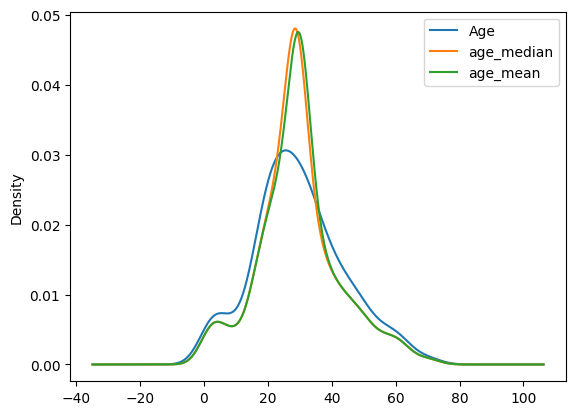

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the median
x_train['age_median'].plot(kind='kde' , ax=ax)

# variable imputed with the mean
x_train['age_mean'].plot(kind='kde' , ax=ax)

# add legends
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

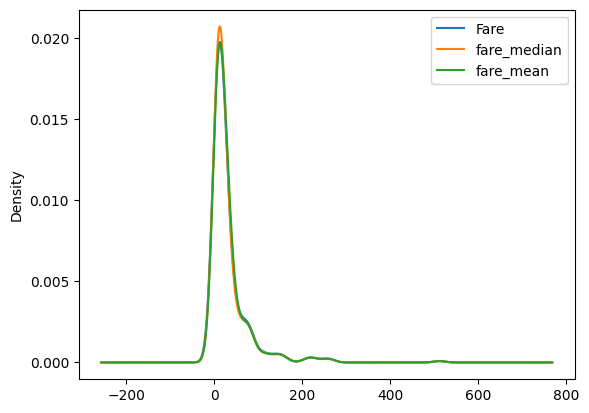

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde',ax=ax)

# variable imputed with the median
x_train['fare_median'].plot(kind='kde' , ax=ax)

# variable imputed with the mean
x_train['fare_mean'].plot(kind='kde' , ax=ax)

# add legends
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

<AxesSubplot: >

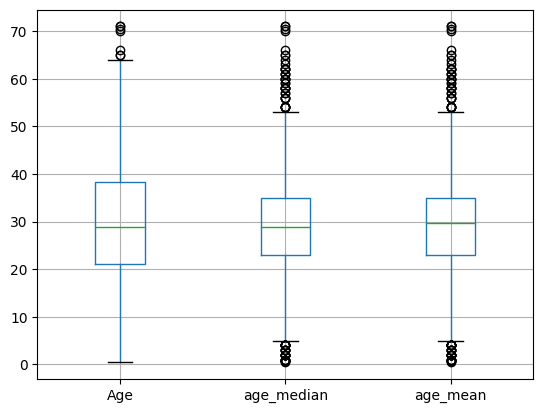

In [30]:
x_train[['Age' , 'age_median' , 'age_mean']].boxplot()

<AxesSubplot: >

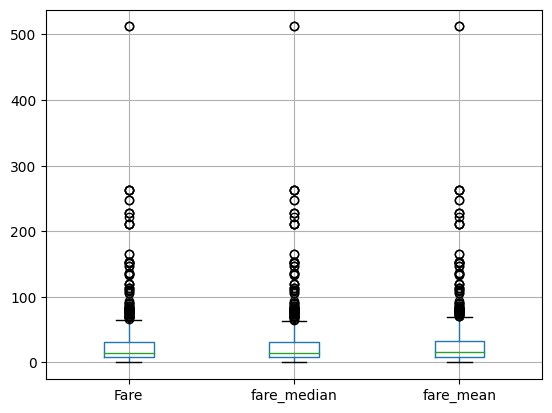

In [31]:
x_train[['Fare' , 'fare_median' , 'fare_mean']].boxplot()

### USING SKLEARN

In [32]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [35]:
trf = ColumnTransformer([
    ('imputer1', imputer1 , ['Age']),
    ('imputer2', imputer2 , ['Fare'])
], remainder='passthrough')

In [36]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [37]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [38]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

#### Arbitary value imputation

In [40]:
# x_train['age_99'] = x_train['Age'].fillna(99)
# x_train['age_minus1'] = x_train['Age'].fillna(-1)

# x_train['fare_999'] = x_train['Fare'].fillna(999)
# x_train['fare_minus1'] = x_train['Fare'].fillna(-1)

# Same process repeat after that .

### USING SKLEARN 

# imputer1 = SimpleImputer(strategy='constant' , fill_value=99)
# imputer2 = SimpleImputer(strategy='constant' , fill_value=999)

# same after this .